Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Maxim Migulya"
COLLABORATORS = "Maxim Migulya"

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        polynomial = 0
        
        for i in range(len(self.xk)):
            l_i = self.yk[i]
            x_i = self.xk[i]
            for x_j in self.xk:
                if x_j != x_i:
                    l_i *= (x - x_j)/(x_i - x_j)
            polynomial += l_i
        
        return polynomial

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
import matplotlib.pyplot as plt
from math import pi, cos

In [5]:
def Chebyshev_nodes(n, a, b):
    nodes = []
    for i in range(1,n + 1):
        nodes.append(0.5*(a + b) + 0.5*(b - a)*cos(((2*i-1)/(2*n))*pi))
    nodes = np.array(nodes)
    return nodes

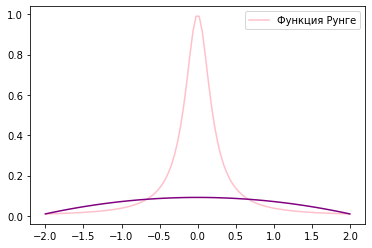

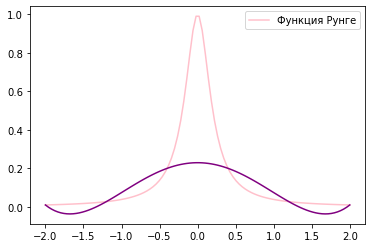

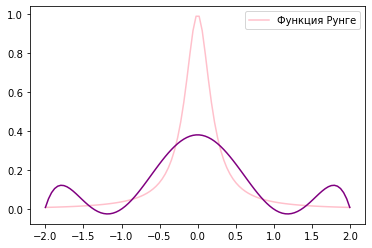

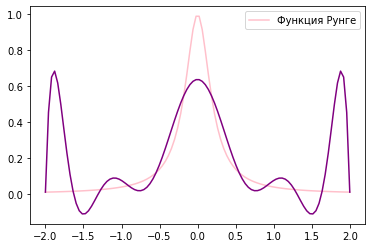

In [6]:
m = [4,6,8,12]
for i in m:
    x = np.linspace(-2, 2, 100)
    f_x = [runge_func(i) for i in x]
    xx_ = np.linspace(-2, 2, i)
    yy_ = runge_func(xx_)
    lagr = LagrangeInterpolator(xx_, yy_)
    y = [lagr(xval) for xval in x]
    plt.subplots()
    plt.plot(x, f_x,'pink', label = 'Функция Рунге')
    plt.plot(x, y, 'purple')
    plt.legend()

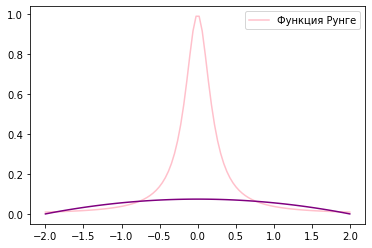

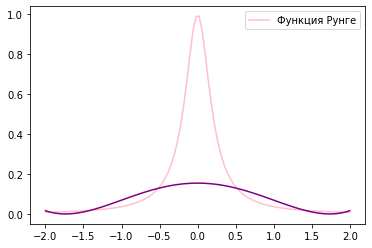

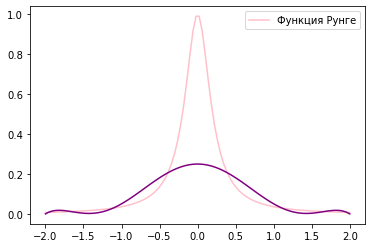

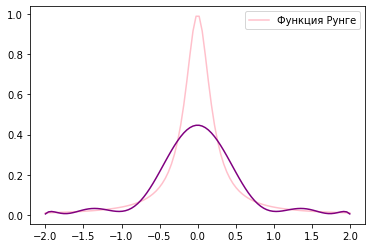

In [7]:
m = [4,6,8,12]
for i in m:
    x = np.linspace(-2, 2, 100)
    f_x = [runge_func(i) for i in x]
    xx_ = Chebyshev_nodes(i, -2, 2)
    yy_ = runge_func(xx_)
    lagr = LagrangeInterpolator(xx_, yy_)
    y = [lagr(xval) for xval in x]
    plt.subplots()
    plt.plot(x, f_x,'pink', label = 'Функция Рунге')
    plt.plot(x, y, 'purple')
    plt.legend()